# Elementos de Programação - 2018/19 - ficha 3

### Versão A

In [1]:
#### a)

def white(n,m):
    return [[0 for j in range(m)] for i in range(n)]

def flip(bmp,i,j):
    bmp[i][j]=1-bmp[i][j]
    return bmp

def isblack(bmp,i,j):
    return bmp[i][j]==1

def height(bmp):
    return len(bmp)

def width(bmp):
    return len(bmp[0])

def vglue(bmp1,bmp2):
    return bmp1+bmp2

#### b)

def hglue(bmp1,bmp2):
    n=height(bmp1)
    m1=width(bmp1)
    m2=width(bmp2)
    assert n==height(bmp2)
    res=white(n,m1+m2)
    for i in range(n):
        for j in range(m1+m2):
            if (j<m1 and isblack(bmp1,i,j)) or (j>=m1 and isblack(bmp2,i,j-m1)):
                res=flip(res,i,j)
    return res

In [2]:
img=flip(white(3,3),1,1)
img

[[0, 0, 0], [0, 1, 0], [0, 0, 0]]

In [6]:
w=[vglue(img,img)]

### Versão B

In [11]:
#### a)

def white(n,m):
    return (n,m,[])

def flip(bmp,i,j):
    (n,m,blacks)=bmp
    if (i,j) in blacks:
        blacks.remove((i,j))
    else:
        blacks.append((i,j))
    return bmp

def color(bmp,i,j):
    (n,m,blacks)=bmp
    if (i,j) in blacks:
        return "black"
    else:
        return "white"
    
def negative(bmp):
    (n,m,blacks)=bmp
    whites=[(i,j) for i in range(n) for j in range(m) if not((i,j) in blacks)]
    return (n,m,whites)

def dim(bmp):
    (n,m,blacks)=bmp
    return (n,m)

def moveup(bmp):
    (n,m,blacks)=bmp
    return (n,m,list(map(lambda p:(p[0]-1,p[1]),filter(lambda p:p[0]!=0,blacks))))

#### b)

def moveright(bmp):
    (n,m)=dim(bmp)
    res=white(n,m)
    for i in range(n):
        for j in range(m-1):
            if color(bmp,i,j)=="black":
                res=flip(res,i,j+1)
    return res


In [4]:
img=flip(flip(flip(flip(white(3,3),0,1),1,1),1,2),2,1)
img

(3, 3, [(0, 1), (1, 1), (1, 2), (2, 1)])

In [12]:
#### to 01matrix

def tomatrix(bmp):
    (n,m,blacks)=bmp
    res=[[0 for j in range(m)] for i in range(n)]
    for (i,j) in blacks:
        res[i][j]=1
    return res

w=[tomatrix(moveup(img))]

### Versão C

In [3]:
#### a)

def black(n,m):
    return [[True for j in range(m)] for i in range(n)]

def flip(bmp,i,j):
    bmp[i][j]=not(bmp[i][j])
    return bmp

def iswhite(bmp,i,j):
    return not(bmp[i][j])

def negative(bmp):
    return list(map(lambda w:list(map(lambda x:not(x),w)),bmp))

def dim(bmp):
    return (len(bmp),len(bmp[0]))

def wframe(bmp):
    wline=[False for j in range(len(bmp[0]))]
    return [wline]+list(map(lambda w:[False]+w[1:-1]+[False],bmp[1:-1]))+[wline]

#### b)

def bframe(bmp):
    (n,m)=dim(bmp)
    res=black(n,m)
    for i in range(1,n-1):
        for j in range(1,m-1):
            if iswhite(bmp,i,j):
                res=flip(res,i,j)
    return res

In [4]:
img=flip(flip(flip(negative(black(4,4)),0,0),1,2),2,1)
img

[[True, False, False, False],
 [False, False, True, False],
 [False, True, False, False],
 [False, False, False, False]]

In [8]:
#### to 01matrix

def tomatrix(bmp):
    return list(map(lambda w:list(map(lambda x:1 if x else 0,w)),bmp))

w=[tomatrix(wframe(img))]

### Versão D

In [1]:
#### a)

def black(n,m):
    return (n,m,[])

def flip(bmp,i,j):
    (n,m,whites)=bmp
    if (i,j) in whites:
        whites.remove((i,j))
    else:
        whites.append((i,j))
    return bmp

def color(bmp,i,j):
    (n,m,whites)=bmp
    if (i,j) in whites:
        return "white"
    else:
        return "black"
    
def negative(bmp):
    (n,m,whites)=bmp
    blacks=[(i,j) for i in range(n) for j in range(m) if not((i,j) in whites)]
    return (n,m,blacks)

def dim(bmp):
    (n,m,whites)=bmp
    return (n,m)

def scrollright(bmp):
    (n,m,whites)=bmp
    return (n,m,list(map(lambda p:(p[0],(p[1]+1)%m),whites)))

#### b)

def scrolldown(bmp):
    (n,m)=dim(bmp)
    res=black(n,m)
    for i in range(n):
        for j in range(m):
            if color(bmp,i,j)=="white":
                res=flip(res,(i+1)%n,j)
    return res

In [2]:
img=flip(flip(flip(flip(negative(black(3,3)),0,1),1,1),1,2),2,1)
img

(3, 3, [(0, 0), (0, 2), (1, 0), (2, 0), (2, 2)])

In [6]:
#### to 01matrix

def tomatrix(bmp):
    (n,m,whites)=bmp
    res=[[1 for j in range(m)] for i in range(n)]
    for (i,j) in whites:
        res[i][j]=0
    return res

w=[tomatrix(scrollright(img))]

### Visualização

In [4]:
from pylab import *

<IPython.core.display.Javascript object>


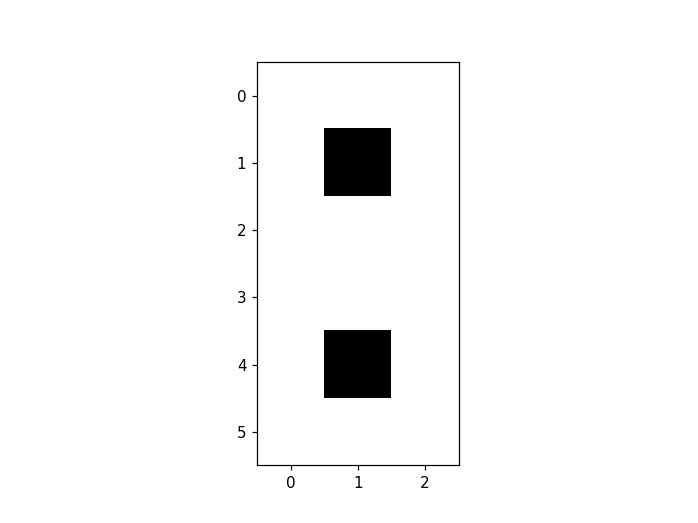

In [7]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def animate(j):
    im.set_array(w[j])
    return im,

fig = plt.figure()
im = plt.imshow(w[0], cmap=cm.binary, interpolation = 'nearest')
    
anim = animation.FuncAnimation(fig, animate, frames=range(len(w)+1), interval=50, blit=True)
plt.show()